# Simple Logistic Regression

The code written isn't optimized, as it isn't the goal of this notebook. The purpose of this notebook is to present to you an intuitive and easy way to understand how a simple logistic regression works. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Logistic regression is the simplest form of classification algorithms. Classification algorithms are used to predict a label given certain data. It is used to determine flower species (the famous Iris dataset), gender, survival... There are countless of applications. We will look at the simplest form for logistic regression, using an example. We will try to predict whether a person will like chocolate or not depending on their love for fruit.

In [2]:
df2 = pd.DataFrame(np.random.randint(low=0, high=11, size=(101, 5)),\
                   index = ['person {}'.format(n) for n in range(101)],\
                   columns=['Banana','Orange', 'Strawberry', 'Apple', 'Passion Fruit'])
df3 = pd.DataFrame({'Chocolate': np.append(np.random.randint(2, size=100), '?')},\
                   index = ['person {}'.format(n) for n in range(101)])
df = df2.join(df3)
df.tail(10)

,Banana,Orange,Strawberry,Apple,Passion Fruit,Chocolate
person 91,5,10,5,3,9,1
person 92,3,5,5,4,5,0
person 93,6,10,10,1,0,1
person 94,1,8,4,6,2,1
person 95,5,10,9,0,8,0
person 96,6,10,8,5,8,1
person 97,1,5,1,9,10,0
person 98,5,8,4,5,3,0
person 99,4,4,1,8,6,1
person 100,7,10,3,1,4,?


Alright. Here is our dataset. As we can see, the choice of fruit and chocolate varies among people. We would like to know if person 100 in our survey will like Chocolate or not.

The structure of a logistic algorithm goes as follows:
For each person, we will multiply each attribute by a random weight, sum them up and transform it into a number between 0 and 1.

Then, we will take each output, compute the error with the real value and then adjust the random weights.

Sounds a bit complicated without a graph doesn't it? Let's see with Sarah

You don't need to look at the code below, just the figure.

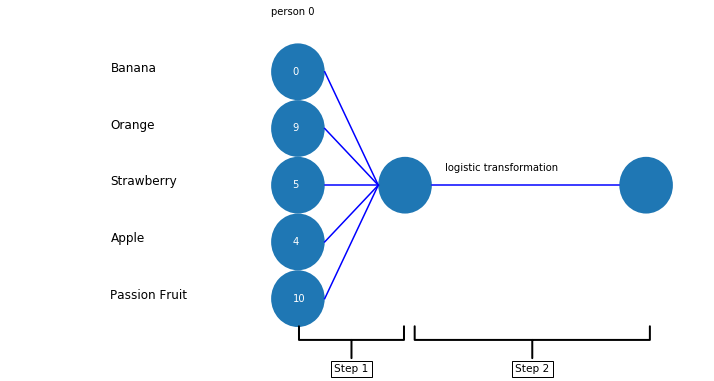

In [3]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots(figsize=(12,6))

x1 = 0.2
y1 = 0.8
r = 0.1

space = 0.6
patches = []
fruits = df.columns.tolist()[:-1]
constantline = y1-2*0.2

for n in range(5):
    circle = Circle((x1*2+space, y1 - n*0.2), r);
    patches.append(circle);
    plt.text(x1*2-0.1, y1 - n*0.2, fruits[n], fontsize=12);
    plt.text(x1*2+space-0.02, y1-n*0.2-0.01, df.iloc[0,n], color = 'w')
    ax.plot([x1*2+space+r, x1*2+space+0.3], [y1 - n*0.2, constantline], color = 'b')

#Output node
constantline = y1-2*0.2
patches.append(Circle((x1*2+space+0.4, constantline), r))

#Transformation node
patches.append(Circle((x1*2+space+1.3, constantline), r))
ax.plot([x1*2+space+0.5, x1*2+space+1.2], [constantline, constantline], color = 'b')
plt.text(x1*2+space+0.55,constantline +0.05, 'logistic transformation');

p = PatchCollection(patches, alpha=1);
ax.add_collection(p);

#Person's name
plt.text(x1*2+0.5, 1, df.index[0]);
ax.set_xlim(xmin = 0, xmax = 2.5);
ax.set_ylim(ymin = -0.15, ymax = 1);

fs = 7

ax.annotate('Step 1', xy=(0.48, 0.01), xytext=(0.48, -0.1), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1.3', lw=2.0))

ax.annotate('Step 2', xy=(0.75, 0.01), xytext=(0.75, -0.1), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=1.3', lw=2.0))

plt.axis('off');
plt.show();

All right! In this graph we have our inputs on the left and our outputs on the right. Logistic regression consists of two different steps.

The first step is simply multiplying each attribute by a random weight generated by the computer. To do this, we will need to vectorize the weights and our attributes, and then multiply them again one another. We denote the weight matrix $\theta$, and each individual weight for each attribute j $\theta_j$

If you haven't seen linear algebra, Khan Academy has an excellent video on it:

https://www.khanacademy.org/math/linear-algebra/matrix-transformations/composition-of-transformations/v/linear-algebra-matrix-product-examples


In [4]:
#Creating random matrix
weights = np.matrix(np.random.rand(df.shape[1]-1, 1))
attributes = df.iloc[0,:-1].tolist()

#Multiplying each of them, outputing in summation
sol = attributes * weights
solution = sol[0,0]

Let's update our figure

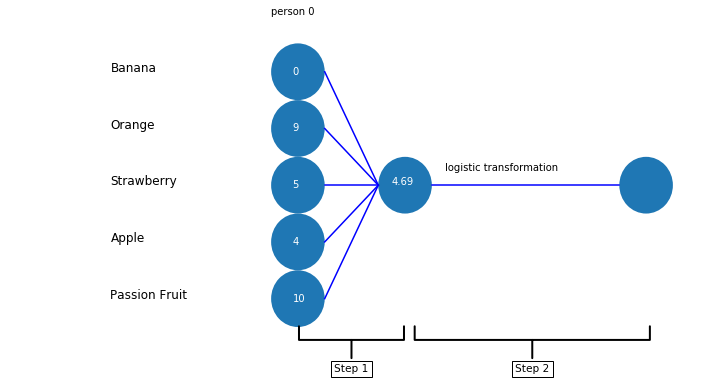

In [5]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots(figsize=(12,6))

x1 = 0.2
y1 = 0.8
r = 0.1

space = 0.6
patches = []
fruits = df.columns.tolist()[:-1]
constantline = y1-2*0.2

for n in range(5):
    circle = Circle((x1*2+space, y1 - n*0.2), r);
    patches.append(circle);
    plt.text(x1*2-0.1, y1 - n*0.2, fruits[n], fontsize=12);
    plt.text(x1*2+space-0.02, y1-n*0.2-0.01, df.iloc[0,n], color = 'w')
    ax.plot([x1*2+space+r, x1*2+space+0.3], [y1 - n*0.2, constantline], color = 'b')

#Output node
constantline = y1-2*0.2
patches.append(Circle((x1*2+space+0.4, constantline), r))

#Transformation node
patches.append(Circle((x1*2+space+1.3, constantline), r))
ax.plot([x1*2+space+0.5, x1*2+space+1.2], [constantline, constantline], color = 'b')
plt.text(x1*2+space+0.55,constantline +0.05, 'logistic transformation');

p = PatchCollection(patches, alpha=1);
ax.add_collection(p);

#Person's name
plt.text(x1*2+0.5, 1, df.index[0]);
ax.set_xlim(xmin = 0, xmax = 2.5);
ax.set_ylim(ymin = -0.15, ymax = 1);

fs = 7

ax.annotate('Step 1', xy=(0.48, 0.01), xytext=(0.48, -0.1), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1.3', lw=2.0))

ax.annotate('Step 2', xy=(0.75, 0.01), xytext=(0.75, -0.1), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=1.3', lw=2.0))


#Summation text
plt.text(x1*2+space+0.35, constantline, np.round(solution,2), color = 'w')

plt.axis('off');
plt.show();

Now that we have our sum, however our output should be either 0 or 1. Given that this intermediate step will never give us 0 or 1 exactly, we need to transform this number into another one. This can be achieved using a logistic function.

The goal of a logistic function is to change a number to be between 0 and 1. From there, we add a threshold value, where every number above the threshold will be considered 1 and every number below 0. The most well-known logistic regression is the sigmoid function.

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

For reference, the function between -10 and 10 looks like this.

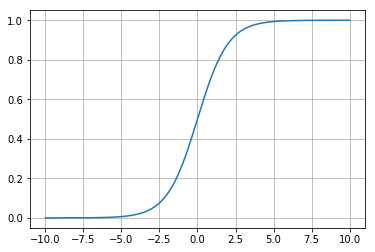

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10,10, 1000)
y = [sigmoid(number) for number in x]

plt.grid(True)
plt.plot(x,y);

Now that we have our function, let's pass our solution variable to the function, and then select our threshold. For this example, let's set our threshold to 0.5

In [7]:
threshold = 0.5
output = sigmoid(solution)
print(1 if output > threshold else 0)

1


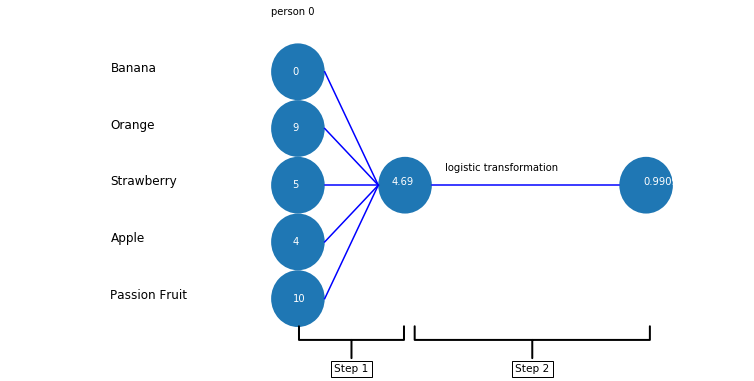

In [8]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots(figsize=(12,6))

x1 = 0.2
y1 = 0.8
r = 0.1

space = 0.6
patches = []
fruits = df.columns.tolist()[:-1]
constantline = y1-2*0.2

for n in range(5):
    circle = Circle((x1*2+space, y1 - n*0.2), r);
    patches.append(circle);
    plt.text(x1*2-0.1, y1 - n*0.2, fruits[n], fontsize=12);
    plt.text(x1*2+space-0.02, y1-n*0.2-0.01, df.iloc[0,n], color = 'w')
    ax.plot([x1*2+space+r, x1*2+space+0.3], [y1 - n*0.2, constantline], color = 'b')

#Output node
constantline = y1-2*0.2
patches.append(Circle((x1*2+space+0.4, constantline), r))

#Transformation node
patches.append(Circle((x1*2+space+1.3, constantline), r))
ax.plot([x1*2+space+0.5, x1*2+space+1.2], [constantline, constantline], color = 'b')
plt.text(x1*2+space+0.55,constantline +0.05, 'logistic transformation');

p = PatchCollection(patches, alpha=1);
ax.add_collection(p);

#Person's name
plt.text(x1*2+0.5, 1, df.index[0]);
ax.set_xlim(xmin = 0, xmax = 2.5);
ax.set_ylim(ymin = -0.15, ymax = 1);

fs = 7

ax.annotate('Step 1', xy=(0.48, 0.01), xytext=(0.48, -0.1), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=1.3', lw=2.0))

ax.annotate('Step 2', xy=(0.75, 0.01), xytext=(0.75, -0.1), xycoords='axes fraction', 
            fontsize=fs*1.5, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=1.3', lw=2.0))


#Summation text
plt.text(x1*2+space+0.35, constantline, np.round(solution,2), color = 'w')

#Output text
plt.text(x1*2+space+1.29, constantline, output, color = 'w')

plt.axis('off');
plt.show();

We are almost there! The only part we need to add is the adjustment to the weights, so that our algorithms learns. The error function that is typically used in logistic regression is:

$$ Cost(\sigma(x^i), y^i) = - y^i*log(\sigma(x^i)) - (1-y^i)*log(1-\sigma(x^i))$$
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} Cost(\sigma(x^i), y^i)) $$

Why this function is used specifically is beyond this simple notebook. 

Let's calculate our cost

In [9]:
def cost(theta,sol):
    return -sol*np.log(theta)-(1-sol)*np.log(1-theta)

print(cost(output, int(df.iloc[0,-1])))

4.702733208034278


Now that we have the cost, we need to calculate the adjustment rate for each weights. For this we will look at how each weights influences the error. This method, called **Gradient Descent**, is used as an error and weight adjustment for every algorithm. For our weight $\theta_j$ adjustment, it is given by

$$\theta_j = \theta_j - \alpha*\frac{\partial}{\partial \theta_j} J(\theta)$$

Where $\alpha$ is the learning rate. Let's compute the partial derivative of J for just one sum, instead for m (Like this we don't need to deal with the summation).

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} (-y*log(\sigma(x))-(1-y)*log(1-\sigma(x))$$

An important derivative to know:

$$\frac{d}{dx} \sigma(x) = dx*\sigma(x)*(1-\sigma(x))$$

Therefore:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} (-y*log(\sigma(x))-(1-y)*log(1-\sigma(x))$$

$$ \Leftrightarrow \frac{\partial}{\partial \theta_j} J(\theta) = [-y*\frac{x_j*\sigma(x)*(1-\sigma(x))}{\sigma(x)} - (1-y)*\frac{-x_j*\sigma(x)*(1-\sigma(x))}{1-\sigma(x)}]$$

$$ \Leftrightarrow \frac{\partial}{\partial \theta_j} J(\theta) = [-y*x_j*(1-\sigma(x)) - (1-y)*(-x_j*\sigma(x))]$$

$$ \Leftrightarrow \frac{\partial}{\partial \theta_j} J(\theta) = x_j*[-y*(1-\sigma(x)) +(1-y)*\sigma(x)]$$

$$ \Leftrightarrow \frac{\partial}{\partial \theta_j} J(\theta) = x_j*(\sigma(x) - y)$$

We made it through the derivative! Now, we just need to program it. Given that we have more than one weight, we will need to create an adjustment matrix.

In [10]:
def adjustment(adjustment, weight, label):
    adjust = []
    summation = attributes * weight
    summa = summation[0,0]
    for n in range(len(adjustment)):
        error = adjustment[n]*(sigmoid(summa)-label)
        adjust.append(error)
    return np.reshape(np.array(adjust), weight.shape)

attributes = df.iloc[0,:-1].tolist()
adjusted = adjustment(attributes, weights, int(df.iloc[0,-1]))

print(adjusted)

[[0.        ]
 [8.91836593]
 [4.95464774]
 [3.96371819]
 [9.90929548]]


Now, our last step would be to adjust our weights accordingly

In [12]:
nweights = weights - adjusted
print(nweights)

[[ 0.67961253]
 [-8.79373312]
 [-4.90189842]
 [-3.8275158 ]
 [-9.6329585 ]]


And there we go! We adjusted our weights. We have successfully adjusted our weights. Now, let's combine our code. We will want to iterate 3 times in the whole entire list. We must becareful to not iterate through the person we want to know if he likes chocolate or not.

In [33]:
#Graphing purposes (optional)
errors = []
position = []
avgpos =  []
avgerror = []
m = 0


def cost(theta,sol):
    return -sol*np.log(theta)-(1-sol)*np.log(1-theta)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def adjustment(adjustment, weight, label):
    adjust = []
    summation = attributes * weight
    summa = summation[0,0]
    for n in range(len(adjustment)):
        error = adjustment[n]*(sigmoid(summa)-label)
        adjust.append(error)
    return np.reshape(np.array(adjust), weight.shape)

for _ in range(3):
    for n in range(df.shape[0]-1):
        #Step 1
        attributes = df.iloc[n,:-1].tolist()
        label = int(df.iloc[0,-1])
        sol = attributes * weights
        solution = sol[0,0]
        #Step 2
        output = sigmoid(solution)
        
        #Error calculation
        error = cost(output, int(df.iloc[n,-1]))
                     
        #Adjustment calculation
        adjusted = adjustment(attributes, weights, label)
        
        #Adjust
        weights -= adjusted
                     
        #Graphing purposes (optional)
        errors.append(error)
        avgerror.append(np.average(errors))
        position.append(m) 
        m+=1

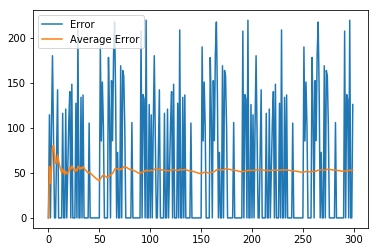

In [37]:
plt.plot(position, errors, label='Error');
plt.plot(position, avgerror, label = 'Average Error');
plt.legend();

Although the error at each point fluctuates greatly, the average error decreases from our initial instance. This is the behavior that is expected, and shows that our algorithm works relatively well! And we only needed about 35 lines of code! Great work!

This is the basis of many different logistic regression algorithms. We can expand this to more attributes, more outputs and better cost functions and logistic functions. If you still have some doubts, please ask! I am looking forward to clarifying your doubts! 

You've accomplished a milestone in your quest towards learning Machine Learning! Isn't it fascinating how, with little algebra, code and logic, we were able to produce such a useful and powerful tool? I believe that you can push yourself even further! I challenge you to optimize these lines of code, to get a faster output from the computer! There's so much you can improve this simple algorithm! It's a great exercise to start thinking about linear algebra and even other functions that exists in Python. Thank you very much for following! I wish you the best in your quest towards becoming Machine Learning Expert!.